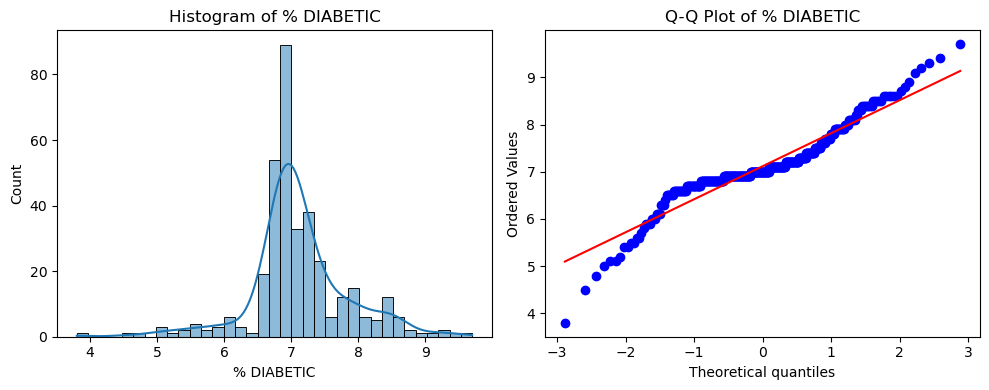

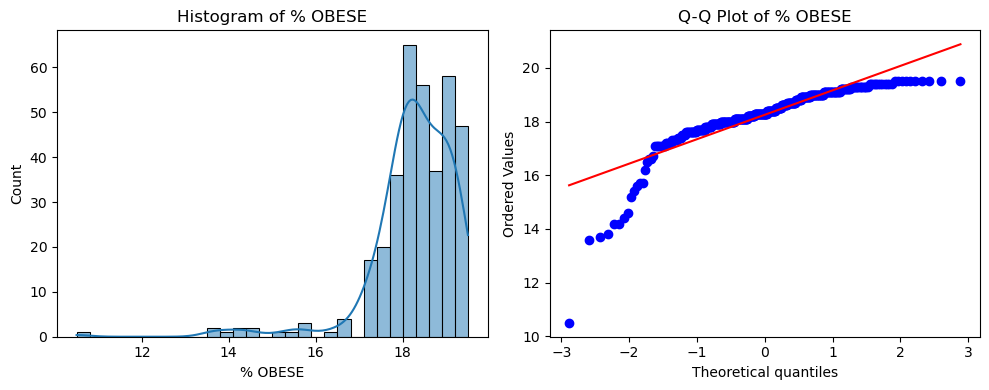

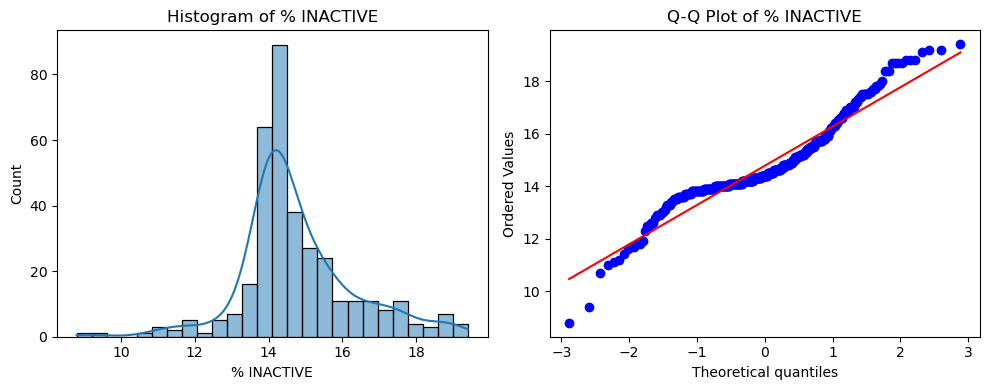

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan
import warnings
warnings.filterwarnings("ignore")
file_path = 'cdc-diabetes-2018_1.xlsx'
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names
dfs = {}
for sheet_name in sheet_names:
    df = excel_file.parse(sheet_name)
    dfs[sheet_name] = df
df1=dfs['Diabetes']
df2=dfs['Obesity']
df3=dfs['Inactivity']
merged_df = df1.merge(df2, on='FIPS').merge(df3, on='FIPS')
columns_to_extract = ['YEAR', 'FIPS', 'COUNTY', 'STATE', '% DIABETIC', '% OBESE', '% INACTIVE']
result_df = merged_df[columns_to_extract]

# Assuming you have a DataFrame named 'result_df' and you want to analyze three columns: '% OBESE', 'Column2', and 'Column3'
columns_to_analyze=['% DIABETIC','% OBESE','% INACTIVE']

for column_name in columns_to_analyze:
    # Create a separate histogram plot
    plt.figure(figsize=(10, 4))  # Optional: Adjust the figure size
    plt.subplot(1, 2, 1)  # Create the left subplot for the histogram
    sns.histplot(result_df[column_name], kde=True)
    plt.title(f'Histogram of {column_name}')
    
    # Create a separate Q-Q plot
    plt.subplot(1, 2, 2)  # Create the right subplot for the Q-Q plot
    stats.probplot(result_df[column_name], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column_name}')
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [20]:
result_df.columns

Index(['YEAR', 'FIPS', 'COUNTY', 'STATE', '% DIABETIC', '% OBESE',
       '% INACTIVE'],
      dtype='object')

In [2]:
#Descriptive Statistics
print("Descriptive Statistics")
print("% DIABETIC")
print("Median = ",round(result_df['% DIABETIC'].median(),5))
print("Mean = ", round(result_df['% DIABETIC'].mean(),5))
print("Stdev = ",round(np.std(result_df['% DIABETIC']),5))
print("Skewness = ",round(stats.skew(result_df['% DIABETIC']),5))
print("Kurtosis = ",round(stats.kurtosis(result_df['% DIABETIC'],fisher=False),5))

print("% INACTIVE")
print("Median = ",round(result_df['% INACTIVE'].median(),5))
print("Mean = ", round(result_df['% INACTIVE'].mean(),5))
print("Stdev = ",round(np.std(result_df['% INACTIVE']),5))
print("Skewness = ",round(stats.skew(result_df['% INACTIVE']),5))
print("Kurtosis = ",round(stats.kurtosis(result_df['% INACTIVE'],fisher=False),5))

print("% OBESE")
print("Median = ",round(result_df['% OBESE'].median(),5))
print("Mean = ", round(result_df['% OBESE'].mean(),5))
print("Stdev = ",round(np.std(result_df['% OBESE']),5))
print("Skewness = ",round(stats.skew(result_df['% OBESE']),5))
print("Kurtosis = ",round(stats.kurtosis(result_df['% OBESE'],fisher=False),5))

Descriptive Statistics
% DIABETIC
Median =  7.0
Mean =  7.11582
Stdev =  0.72741
Skewness =  -0.04881
Kurtosis =  5.78842
% INACTIVE
Median =  14.4
Mean =  14.77627
Stdev =  1.54236
Skewness =  0.42571
Kurtosis =  4.6136
% OBESE
Median =  18.3
Mean =  18.25254
Stdev =  1.02803
Skewness =  -2.75189
Kurtosis =  15.93152


In [3]:
result_df.iloc[:,-3:].corr()

,% DIABETIC,% OBESE,% INACTIVE
% DIABETIC,1.000000,0.389941,0.567104
% OBESE,0.389941,1.000000,0.472656
% INACTIVE,0.567104,0.472656,1.000000


In [4]:
#drop year column as it has no effect on the target variable
result_df.drop(['YEAR'],axis=1, inplace=True)

Before Box-Cox, Kurtosis value =  15.93152
After Box-Cox, Kurtosis value =  2.69533
9.651018266116944


((array([-2.88515143, -2.59366636, -2.42901857, -2.31189165, -2.21987059,
         -2.14351894, -2.07793496, -2.02023277, -1.96856429, -1.92167198,
         -1.87865993, -1.83886638, -1.80178817, -1.76703338, -1.73429059,
         -1.70330805, -1.67387925, -1.64583259, -1.61902386, -1.59333068,
         -1.56864824, -1.54488607, -1.52196551, -1.49981774, -1.47838216,
         -1.45760512, -1.43743893, -1.41784092, -1.39877285, -1.38020021,
         -1.36209183, -1.34441939, -1.32715715, -1.31028156, -1.29377109,
         -1.27760596, -1.26176795, -1.24624028, -1.23100741, -1.21605495,
         -1.20136953, -1.18693873, -1.17275097, -1.15879542, -1.14506198,
         -1.13154118, -1.11822413, -1.1051025 , -1.09216843, -1.07941453,
         -1.06683384, -1.05441978, -1.04216612, -1.03006697, -1.01811677,
         -1.00631022, -0.99464231, -0.98310826, -0.97170353, -0.96042382,
         -0.94926499, -0.93822313, -0.9272945 , -0.9164755 , -0.90576274,
         -0.89515292, -0.88464293, -0.

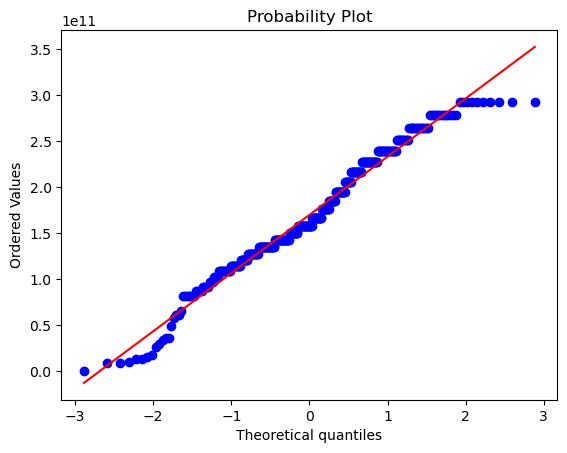

In [5]:
#BOX COX
print("Before Box-Cox, Kurtosis value = ",round(stats.kurtosis(result_df['% OBESE'],fisher=False),5))
result_df['% OBESE'],parameters=stats.boxcox(result_df['% OBESE'])
print("After Box-Cox, Kurtosis value = ",round(stats.kurtosis(result_df['% OBESE'],fisher=False),5))
print(parameters)
stats.probplot(result_df['% OBESE'], dist="norm", plot=plt)

LinearRegression()
R2 Value: 0.2322780423451284


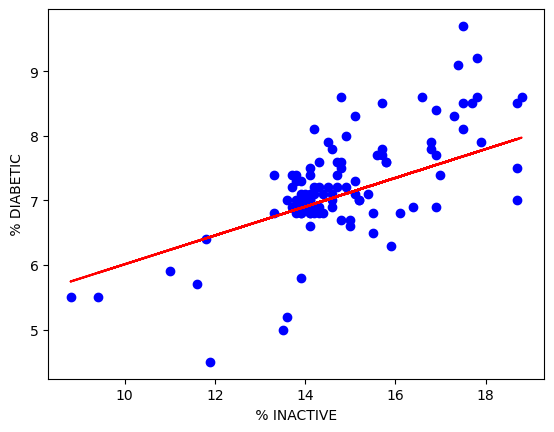

In [6]:
#LINEAR REGRESSION - (INACTIVE and Diabetic)

import pandas as pd
import numpy as np
merged_df2=result_df[['% INACTIVE','% DIABETIC']]
# Separate Target Variable and Predictor Variables
TargetVariable='% DIABETIC'
Predictors=['% INACTIVE']

X=merged_df2[Predictors].values
y=merged_df2[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### Linear Regression in Python #######
import pandas as pd
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
 
#Printing all the parameters of Linear regression
print(RegModel)
 
#Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
 
#Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
 
#Measuring accuracy on Testing Data
#print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))
 
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()


plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, prediction, color="red")
plt.xlabel(" % INACTIVE ")
plt.ylabel(" % DIABETIC ")
plt.show()

LinearRegression()
R2 Value: 0.09724602133841487


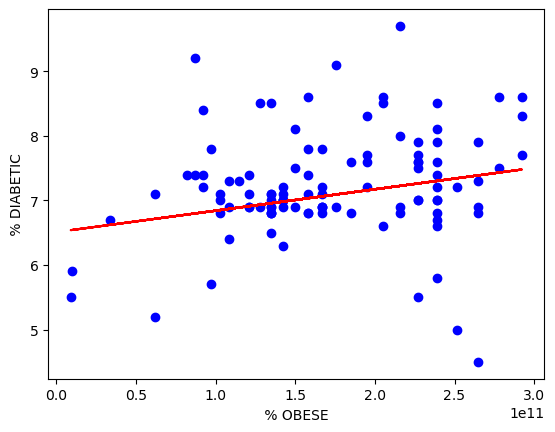

In [7]:
#LINEAR REGRESSION - (OBESE and Diabetic)

import pandas as pd
import numpy as np
merged_df2=result_df[['% OBESE','% DIABETIC']]
# Separate Target Variable and Predictor Variables
TargetVariable='% DIABETIC'
Predictors=['% OBESE']

X=merged_df2[Predictors].values
y=merged_df2[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### Linear Regression in Python #######
import pandas as pd
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
 
#Printing all the parameters of Linear regression
print(RegModel)
 
#Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
 
#Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
 
#Measuring accuracy on Testing Data
#print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))
 
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()

plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, prediction, color="red")
plt.xlabel(" % OBESE ")
plt.ylabel(" % DIABETIC ")
plt.show()

In [8]:
#MLR
import pandas as pd
import numpy as np
merged_df2=result_df[['% INACTIVE','% DIABETIC','% OBESE']]
# Separate Target Variable and Predictor Variables
TargetVariable='% DIABETIC'
Predictors=['% OBESE', '% INACTIVE']

X=merged_df2[Predictors].values
y=merged_df2[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### Linear Regression in Python #######
import pandas as pd
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
 
#Printing all the parameters of Linear regression
print(RegModel)
 
#Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
 
#Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
 
#Measuring accuracy on Testing Data
#print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))
 
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()


LinearRegression()
R2 Value: 0.2408400271596136


,% OBESE,% INACTIVE,% DIABETIC,Predicted% DIABETIC
0,1.668041e+11,14.2,6.9,6.957355
1,1.582579e+11,16.1,6.8,7.326511
2,9.200945e+10,14.5,7.2,6.933391
3,2.160643e+11,14.1,6.9,6.992588
4,2.391681e+11,14.5,7.9,7.098194


In [9]:
# Run the anova function for all categorical columns
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['FIPS', 'COUNTY', 'STATE']
FunctionAnova(inpData=result_df, TargetVariable='% DIABETIC', CategoricalPredictorList=CategoricalPredictorList)

result_df.drop(['FIPS','COUNTY'],axis=1, inplace=True)
result_df.head(5)

##### ANOVA Results ##### 

FIPS is NOT correlated with % DIABETIC | P-Value: nan
COUNTY is NOT correlated with % DIABETIC | P-Value: 0.9531175563887615
STATE is correlated with % DIABETIC | P-Value: 8.279212015659544e-32


,STATE,% DIABETIC,% OBESE,% INACTIVE
0,Alabama,9.4,1.949815e+11,17.0
1,Alaska,6.8,2.160643e+11,16.2
2,Alaska,7.3,2.779873e+11,15.0
3,Alaska,9.2,8.700305e+10,17.8
4,Alaska,6.6,1.582579e+11,15.8


In [10]:
# Use pandas get_dummies function to convert the categorical column into dummies
dummies = pd.get_dummies(result_df['STATE'], prefix='STATE')

# Concatenate the dummies back to the original DataFrame
result_df = pd.concat([result_df, dummies], axis=1)

# Drop the original categorical column if needed
result_df.drop('STATE', axis=1, inplace=True)

result_df.head(5)


,% DIABETIC,% OBESE,% INACTIVE,STATE_Alabama,STATE_Alaska,STATE_Arkansas,STATE_California,STATE_Colorado,STATE_Georgia,STATE_Hawaii,...,STATE_Oklahoma,STATE_Oregon,STATE_Pennsylvania,STATE_South Dakota,STATE_Tennessee,STATE_Texas,STATE_Utah,STATE_Virginia,STATE_Washington,STATE_Wyoming
0,9.4,1.949815e+11,17.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.8,2.160643e+11,16.2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.3,2.779873e+11,15.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,8.700305e+10,17.8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.6,1.582579e+11,15.8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#MLR with state
import pandas as pd
import numpy as np
merged_df2=result_df
# Separate Target Variable and Predictor Variables
TargetVariable='% DIABETIC'
Predictors=['% OBESE', '% INACTIVE', 'STATE_Alabama', 'STATE_Alaska',
       'STATE_Arkansas', 'STATE_California', 'STATE_Colorado', 'STATE_Georgia',
       'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Kansas',
       'STATE_Kentucky', 'STATE_Louisiana', 'STATE_Massachusetts',
       'STATE_Michigan', 'STATE_Mississippi', 'STATE_Missouri',
       'STATE_Montana', 'STATE_Nebraska', 'STATE_Nevada', 'STATE_New Mexico',
       'STATE_New York', 'STATE_North Carolina', 'STATE_North Dakota',
       'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania',
       'STATE_South Dakota', 'STATE_Tennessee', 'STATE_Texas', 'STATE_Utah',
       'STATE_Virginia', 'STATE_Washington', 'STATE_Wyoming']

X=merged_df2[Predictors].values
y=merged_df2[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### Linear Regression in Python #######
import pandas as pd
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
 
#Printing all the parameters of Linear regression
print(RegModel)
 
#Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
 
#Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
 
#Measuring accuracy on Testing Data
#print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))
 
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()

LinearRegression()
R2 Value: 0.5734359074071811


,% OBESE,% INACTIVE,STATE_Alabama,STATE_Alaska,STATE_Arkansas,STATE_California,STATE_Colorado,STATE_Georgia,STATE_Hawaii,STATE_Idaho,...,STATE_Pennsylvania,STATE_South Dakota,STATE_Tennessee,STATE_Texas,STATE_Utah,STATE_Virginia,STATE_Washington,STATE_Wyoming,% DIABETIC,Predicted% DIABETIC
0,1.668041e+11,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.9,7.013307
1,1.582579e+11,16.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.8,6.828668
2,9.200945e+10,14.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.2,7.006364
3,2.160643e+11,14.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.9,7.000755
4,2.391681e+11,14.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.9,7.697889


In [12]:
# Create the interaction term ['% OBESE']*['% INACTIVE']
result_df['Interaction_Term'] = result_df['% OBESE'] * result_df['% INACTIVE']


In [13]:
#MLR with state and interaction term
import pandas as pd
import numpy as np
merged_df2=result_df
# Separate Target Variable and Predictor Variables
TargetVariable='% DIABETIC'
Predictors=['% OBESE', '% INACTIVE', 'STATE_Alabama', 'STATE_Alaska',
       'STATE_Arkansas', 'STATE_California', 'STATE_Colorado', 'STATE_Georgia',
       'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Kansas',
       'STATE_Kentucky', 'STATE_Louisiana', 'STATE_Massachusetts',
       'STATE_Michigan', 'STATE_Mississippi', 'STATE_Missouri',
       'STATE_Montana', 'STATE_Nebraska', 'STATE_Nevada', 'STATE_New Mexico',
       'STATE_New York', 'STATE_North Carolina', 'STATE_North Dakota',
       'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania',
       'STATE_South Dakota', 'STATE_Tennessee', 'STATE_Texas', 'STATE_Utah',
       'STATE_Virginia', 'STATE_Washington', 'STATE_Wyoming',
       'Interaction_Term']

X=merged_df2[Predictors].values
y=merged_df2[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### Linear Regression in Python #######
import pandas as pd
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
 
#Printing all the parameters of Linear regression
print(RegModel)
 
#Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
 
#Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
 
#Measuring accuracy on Testing Data
#print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))
 
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()

LinearRegression()
R2 Value: 0.5915699894556138


,% OBESE,% INACTIVE,STATE_Alabama,STATE_Alaska,STATE_Arkansas,STATE_California,STATE_Colorado,STATE_Georgia,STATE_Hawaii,STATE_Idaho,...,STATE_South Dakota,STATE_Tennessee,STATE_Texas,STATE_Utah,STATE_Virginia,STATE_Washington,STATE_Wyoming,Interaction_Term,% DIABETIC,Predicted% DIABETIC
0,1.668041e+11,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.368619e+12,6.9,7.016859
1,1.582579e+11,16.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.547952e+12,6.8,6.995797
2,9.200945e+10,14.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.334137e+12,7.2,7.016447
3,2.160643e+11,14.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.046507e+12,6.9,7.106070
4,2.391681e+11,14.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.467938e+12,7.9,7.753827


In [14]:
#MLR with state, interaction term with Cross-Validation 
import pandas as pd
import numpy as np

merged_df2=result_df
# Separate Target Variable and Predictor Variables
TargetVariable='% DIABETIC'
Predictors=['% OBESE', '% INACTIVE', 'STATE_Alabama', 'STATE_Alaska',
       'STATE_Arkansas', 'STATE_California', 'STATE_Colorado', 'STATE_Georgia',
       'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Kansas',
       'STATE_Kentucky', 'STATE_Louisiana', 'STATE_Massachusetts',
       'STATE_Michigan', 'STATE_Mississippi', 'STATE_Missouri',
       'STATE_Montana', 'STATE_Nebraska', 'STATE_Nevada', 'STATE_New Mexico',
       'STATE_New York', 'STATE_North Carolina', 'STATE_North Dakota',
       'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania',
       'STATE_South Dakota', 'STATE_Tennessee', 'STATE_Texas', 'STATE_Utah',
       'STATE_Virginia', 'STATE_Washington', 'STATE_Wyoming',
       'Interaction_Term']

X=merged_df2[Predictors].values
y=merged_df2[TargetVariable].values


#######################################
####### K-fold cross validation #######
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
 
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
 
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
 

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

###### Linear Regression in Python #######
import pandas as pd
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

 
#Printing all the parameters of Linear regression
print(RegModel)
 
#Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
 
#Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
 
#Measuring accuracy on Testing Data
#print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))
 
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()
 
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=9, scoring=custom_Scoring)
print('\nAccuracy values for 9-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.6088888028118664

Accuracy values for 9-fold Cross Validation:
 [92.40313573 90.64326473 94.95446143 91.08551608 94.25875662 98.2083155
 97.40654044 98.152247   90.51670135]

Final Average Accuracy of the model: 94.18


In [18]:
#MLR with state, interaction term with Cross-Validation 
import pandas as pd
import numpy as np

merged_df2=result_df
# Separate Target Variable and Predictor Variables
TargetVariable='% DIABETIC'
Predictors=['% OBESE', '% INACTIVE', 'STATE_Alabama', 'STATE_Alaska',
       'STATE_Arkansas', 'STATE_California', 'STATE_Colorado', 'STATE_Georgia',
       'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Kansas',
       'STATE_Kentucky', 'STATE_Louisiana', 'STATE_Massachusetts',
       'STATE_Michigan', 'STATE_Mississippi', 'STATE_Missouri',
       'STATE_Montana', 'STATE_Nebraska', 'STATE_Nevada', 'STATE_New Mexico',
       'STATE_New York', 'STATE_North Carolina', 'STATE_North Dakota',
       'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania',
       'STATE_South Dakota', 'STATE_Tennessee', 'STATE_Texas', 'STATE_Utah',
       'STATE_Virginia', 'STATE_Washington', 'STATE_Wyoming',
       'Interaction_Term']

X=merged_df2[Predictors].values
y=merged_df2[TargetVariable].values


#######################################
####### K-fold cross validation #######
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
 
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
 
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
 

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


import statsmodels.api as sm

# Create the design matrix including a constant term
X_sm = sm.add_constant(merged_df2[['% OBESE', '% INACTIVE', 'STATE_Alabama', 'STATE_Alaska',
       'STATE_Arkansas', 'STATE_California', 'STATE_Colorado', 'STATE_Georgia',
       'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Kansas',
       'STATE_Kentucky', 'STATE_Louisiana', 'STATE_Massachusetts',
       'STATE_Michigan', 'STATE_Mississippi', 'STATE_Missouri',
       'STATE_Montana', 'STATE_Nebraska', 'STATE_Nevada', 'STATE_New Mexico',
       'STATE_New York', 'STATE_North Carolina', 'STATE_North Dakota',
       'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania',
       'STATE_South Dakota', 'STATE_Tennessee', 'STATE_Texas', 'STATE_Utah',
       'STATE_Virginia', 'STATE_Washington', 'STATE_Wyoming',
       'Interaction_Term']])

# Fit the linear regression model
mod_sm = sm.OLS(merged_df2['% DIABETIC'], X_sm)
res_sm = mod_sm.fit()

# Test for heteroscedasticity using the Breusch-Pagan test
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(res_sm.resid, X_sm)

print("Lagrange multiplier statistic: " + str(bp_lm))
print("Lagrange multiplier p-value:   " + str(bp_lm_pvalue))
print("F-statistic:                   " + str(bp_fvalue))
print("P-value of F-statistic:        " + str(bp_f_pvalue))

# If the p-value is less than the chosen significance level (e.g., 0.05), 
# reject the null hypothesis of homoscedasticity
if bp_lm_pvalue < 0.05:
    print("Heteroscedasticity detected")
else:
    print("No heteroscedasticity detected")


Lagrange multiplier statistic: 89.13640232641639
Lagrange multiplier p-value:   2.1211433074131013e-06
F-statistic:                   3.057679088813004
P-value of F-statistic:        1.0268900103737021e-07
Heteroscedasticity detected
